# Exploratory Data Analysis : Haberman's Survival

## About Dataset

### Sources: 
* (a) Donor: Tjen-Sien Lim (limt@stat.wisc.edu) 
* (b) Date: March 4, 1999

### Relevant Information: 
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

### Attributes or Features Information:

* There are 4 features including class label/dependent variable. 
* 30 - It represents age of patient at the time of operation(numerical) 
* 64 - It represents year of operation(numerical) 
* 1 - It tells no of +ve auxillry node detected(numerical) 
* 1.1 - Survival status 1 = the patient survived 5 years or longer 2 = the patient died within 5 year


## Objective

* To predict/classify whether the patient who had undergone surgery for breast cancer will survive after 5 years or not based upon the patient's age, year of treatment and the number of auxiliary lymph nodes

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

# suppress warnings
warnings.filterwarnings("ignore")

# Load habermans.csv into Pandas DataFrame
patients_df = pd.read_csv("haberman.csv")                                             
                                                 

In [55]:
# (Q) how many data-points and features?
print (patients_df.shape)
shape = patients_df.shape
print('\n****** There are {} data-points and {} features in this dataset *******'.format(shape[0], shape[1]))
# Hence there are 305 rows(data-points) and 4 columns(features) in this dataset.

(305, 4)

****** There are 305 data-points and 4 features in this dataset *******


In [56]:
#(Q) What are the column names in our dataset?
print (patients_df.columns)

Index(['30', '64', '1', '1.1'], dtype='object')


In [57]:
# As the columns names are not clear and we know the column names so set the names in dataFrame
patients_df.columns = ['age', 'year_of_treatment', 'positive_aux_nodes','survival_status'] 
columns = patients_df.columns
print('*** column1: "{}", column2: "{}", column3: "{}", column4: "{}" ***'.format(columns[0], columns[1], columns[2], columns[3]))
patients_df.head()
# Now the column names are more readable

*** column1: "age", column2: "year_of_treatment", column3: "positive_aux_nodes", column4: "survival_status" ***


,age,year_of_treatment,positive_aux_nodes,survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [58]:
# modify the target column values to be meaningful as well as categorical
patients_df['survival_status'] = patients_df['survival_status'].map({1:"Survived", 2:"Not Survived"})
patients_df['survival_status'] = patients_df['survival_status'].astype('category')
patients_df.head()

,age,year_of_treatment,positive_aux_nodes,survival_status
0,30,62,3,Survived
1,30,65,0,Survived
2,31,59,2,Survived
3,31,65,4,Survived
4,33,58,10,Survived


In [59]:
#(Q) How many data points for each class are present? 
#(or) How many patients for each class are present?

patients_df["survival_status"].value_counts()

# So there are 2 classes (1(the patient survived 5 years or longer)
# and 2(the patient died within 5 year)) 

# class 1 has 224 patients and class 2 has 81 patients.

Survived        224
Not Survived     81
Name: survival_status, dtype: int64

In [60]:
patients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
age                   305 non-null int64
year_of_treatment     305 non-null int64
positive_aux_nodes    305 non-null int64
survival_status       305 non-null category
dtypes: category(1), int64(3)
memory usage: 7.6 KB


## Observations

* There are 304 values in every feature and there is no null or missing value
* All values are of type int64
* habermans is a imbalanced dataset

## Bivariate  Analysis

### 1. Scatter Plot

A scatter plot is a useful visual representation of the relationship between two numerical variables (attributes) and is usually drawn before working out a linear correlation or fitting a regression line. The resulting pattern indicates the type (linear or non-linear) and strength of the relationship between two variables.

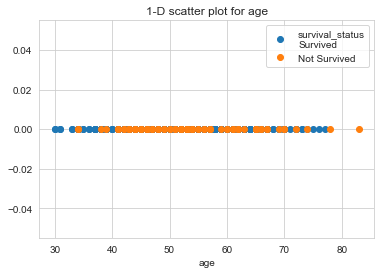

In [61]:
# 1-d scatter plot

survived = patients_df.loc[patients_df["survival_status"] == 'Survived']
not_survived = patients_df.loc[patients_df["survival_status"] == 'Not Survived']
plt.plot(survived["age"], np.zeros_like(survived["age"]), 'o', label = "survival_status\n" "Survived")
plt.plot(not_survived["age"], np.zeros_like(not_survived["age"]), 'o', label = "Not Survived")
plt.title("1-D scatter plot for age")
plt.xlabel("age")
plt.legend()
plt.show()


### observations

* Many person died whose age was between 42-70.

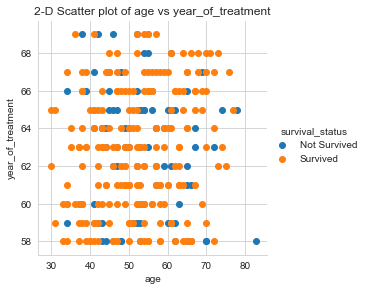

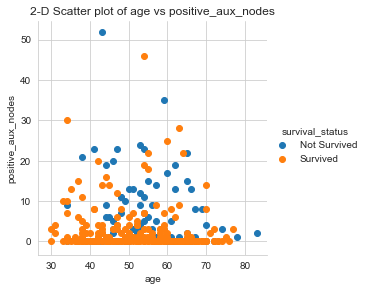

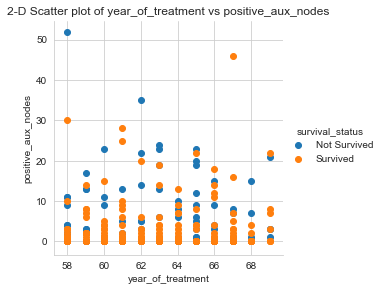

In [62]:
# 2-D Scatter plot with color-coding for each feature type/class.
sns.set_style("whitegrid");
sns.FacetGrid(patients_df, hue="survival_status", size=4) \
   .map(plt.scatter, "age", "year_of_treatment") \
   .add_legend();
plt.title('2-D Scatter plot of age vs year_of_treatment')
plt.show();

# Notice that the blue and orange points cannot be easily seperated.
# we can't draw a line to separate both classes. 
# Can we draw multiple 2-D scatter plots for each combination of features?
# How many cobinations exist? 3C2 = 3.

sns.set_style("whitegrid");
sns.FacetGrid(patients_df, hue="survival_status", size=4) \
   .map(plt.scatter, "age", "positive_aux_nodes") \
   .add_legend();
plt.title('2-D Scatter plot of age vs positive_aux_nodes');
plt.show();

sns.set_style("whitegrid");
sns.FacetGrid(patients_df, hue="survival_status", size=4) \
   .map(plt.scatter, "year_of_treatment", "positive_aux_nodes") \
   .add_legend();
plt.title('2-D Scatter plot of year_of_treatment vs positive_aux_nodes');
plt.show();


**Observation(s):**
1. Seperating both classes is nearly impossibe as they have considerable overlap.
2. Combination of features is not useful in classification

### 2. Pair-plot

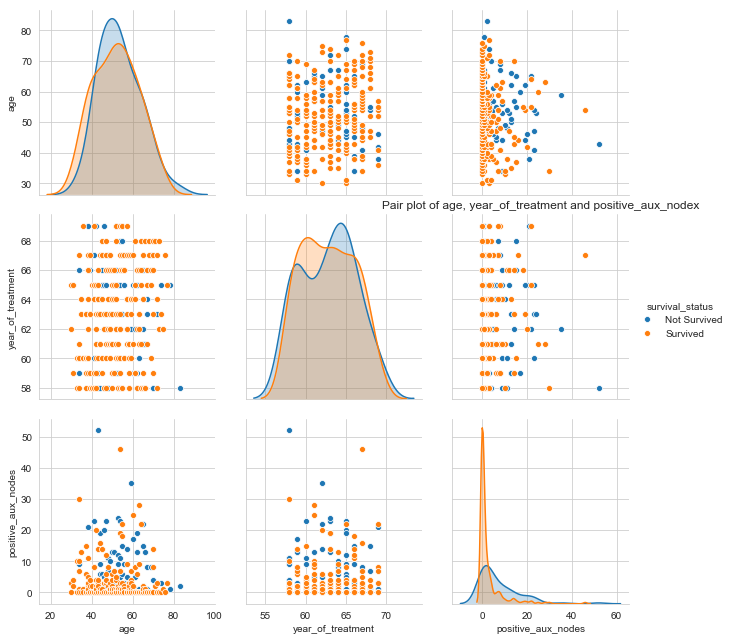

In [63]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(patients_df, hue="survival_status", size=3);
plt.title('Pair plot of age, year_of_treatment and positive_aux_nodex',y = 2.2)
plt.show()

**Observation(s):**
1. Pair plot between year_of_treatment vs positive_aux_nodes gives better separation than all other combinations.

## Univariate Analysis(pdf, cdf, boxplot and violin plot)


### 1. PDF

In [64]:
survived_df = patients_df.loc[patients_df["survival_status"] == "Survived"]
not_survived_df = patients_df.loc[patients_df["survival_status"] == "Not Survived"]

In [65]:
# function to draw PDFs for given feature as argument

def draw_pdf_for_feature(feature):
    g = sns.FacetGrid(patients_df, hue="survival_status", size=5) \
       .map(sns.distplot, feature) \
       .add_legend();
    g.set_axis_labels(feature, 'Density') 
    plt.title('Histogram of {}'.format(feature))
    plt.show();

********* age *********


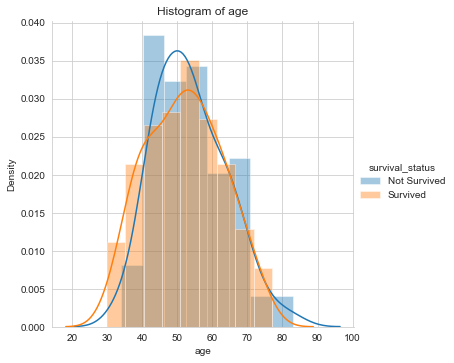

********* year_of_treatment *********


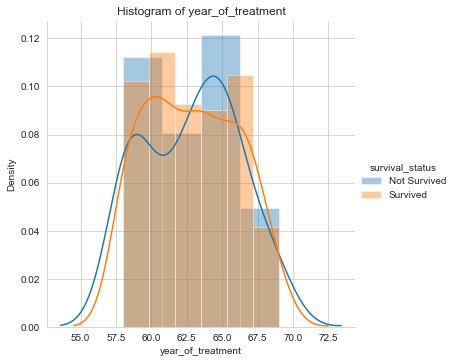

********* positive_aux_nodes *********


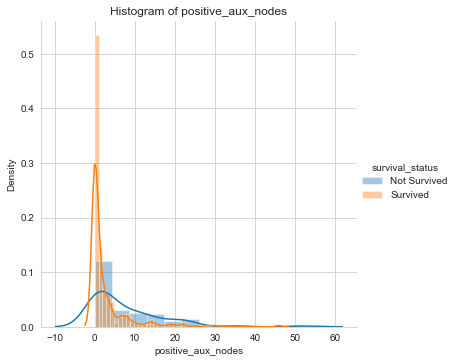

In [66]:
feature_names = patients_df.columns

# Since survival_status is our target feature, we need to remove it from list.
feature_names = feature_names[:-1]

for feature in feature_names:
    print("********* "+feature+" *********")
    draw_pdf_for_feature(feature)

# ['age', 'year_of_treatment', 'positive_aux_nodes', 'survival_status']

**Observation(s):**
1. The number of positive aux nodes of the survivors is highly densed from 0 to 5 which indicate there is more number of survivors in this range as compare to non survivors.


### 2. CDF

* The cumulative distribution function (cdf) is the probability that the variable takes a value less than or equal to x.


In [67]:
def plot_cdf(df, feature):
    print("********* "+feature+" *********")
    counts, bin_edges = np.histogram(patients_df[feature], bins=10, density = True)
    print("Bin Edges: {}".format(bin_edges))
    pdf = counts/sum(counts)
    print("PDF: {}".format(pdf))
    cdf = np.cumsum(pdf)
    print("CDF: {}".format(cdf))
    plt.plot(bin_edges[1:],pdf, label='PDF');
    plt.plot(bin_edges[1:],cdf, '--', label='CDF')
    plt.xlabel(feature) 
    plt.ylabel("% of patient's")
    plt.title('(PDF and CDF) for {}'.format(feature))    
    plt.legend()
    plt.show()
    

********* age *********
Bin Edges: [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
PDF: [0.04918033 0.08852459 0.15081967 0.17377049 0.18032787 0.13442623
 0.13442623 0.05901639 0.02295082 0.00655738]
CDF: [0.04918033 0.13770492 0.28852459 0.46229508 0.64262295 0.77704918
 0.91147541 0.9704918  0.99344262 1.        ]


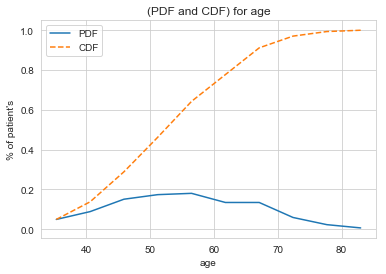

********* year_of_treatment *********
Bin Edges: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
PDF: [0.20655738 0.09180328 0.0852459  0.07540984 0.09836066 0.09836066
 0.09180328 0.09180328 0.08196721 0.07868852]
CDF: [0.20655738 0.29836066 0.38360656 0.45901639 0.55737705 0.6557377
 0.74754098 0.83934426 0.92131148 1.        ]


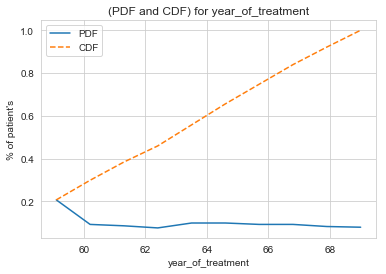

********* positive_aux_nodes *********
Bin Edges: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
PDF: [0.7704918  0.09836066 0.05901639 0.02622951 0.0295082  0.00655738
 0.00327869 0.         0.00327869 0.00327869]
CDF: [0.7704918  0.86885246 0.92786885 0.95409836 0.98360656 0.99016393
 0.99344262 0.99344262 0.99672131 1.        ]


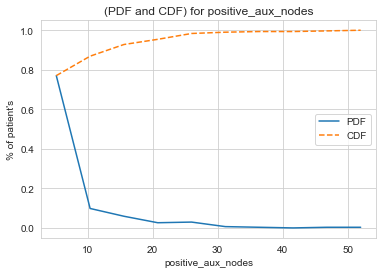

In [68]:
for feature in feature_names:
    plot_cdf(survived_df,feature)

In [69]:
# plot pdf and cdf with survival_status for each feature
def plot_cdf_with_survival_status(feature):
    # survived = df.loc[patients_df["survival_status"] == 'Survived']
    # not_survived = df.loc[patients_df["survival_status"] == 'Not Survived']
    # cdf gives you cummulative probability associated with a function
    # Cumulative sum of area under curve upto gives you cdf
    survived = patients_df.loc[patients_df["survival_status"] == 'Survived']
    not_survived = patients_df.loc[patients_df["survival_status"] == 'Not Survived']
    label = ["pdf of class survived", "cdf of class survived", "pdf of class not survived", "cdf of class not survived"]
    counts, bin_edges = np.histogram(survived[feature], bins=10, density = True)
    pdf = counts/(sum(counts))
    cdf = np.cumsum(pdf)
    plt.title("pdf and cdf for {}".format(feature))
    plt.xlabel(feature)
    plt.ylabel("% of patient's")
    plt.plot(bin_edges[1:], pdf)
    plt.plot(bin_edges[1:], cdf)

    counts, bin_edges = np.histogram(not_survived[feature], bins=10, density = True)
    pdf = counts/(sum(counts))
    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:], pdf)
    plt.plot(bin_edges[1:], cdf)
    plt.legend(label)

    plt.show()


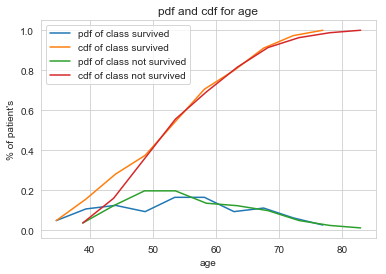

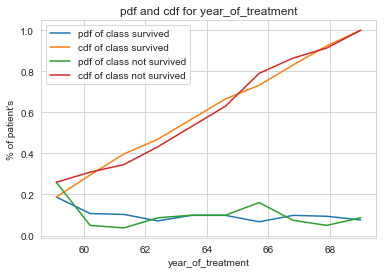

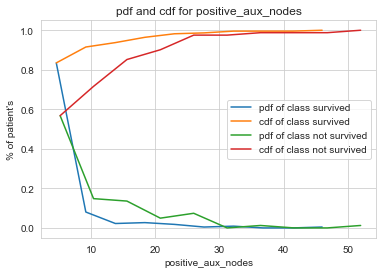

In [70]:
for feature in feature_names:
    plot_cdf_with_survival_status(feature)

**Observation(s):**
1. Almost 78% of the patients have less than or equal to 5 positive aux nodes.
2. patients who has more than 46 auxillary_lymph_node did not survived.

### 3. Box plot and Whiskers

* Box plot takes a less space and visually represents the five number summary of the data points in a box. 
* The outliers are displayed as points outside the box.
1. Q1 (25th percentile)
2. Q2 (50th percentile or median)
3. Q3 (75th percentile)
4. Q1 - 1.5*IQR
5. Q3 + 1.5*IQR
* point 4 and 5 denotes outliers.
* Inter Quartile Range = Q3 -Q1



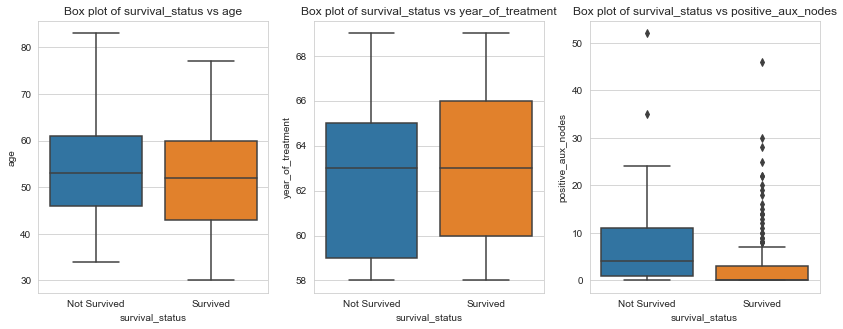

In [71]:
def box_plot_for_feature(feature, axis):
    g = sns.boxplot(x='survival_status', y=feature, data=patients_df, ax=axis)
    g.set_title('Box plot of survival_status vs {}'.format(feature))
    
fig, ax = plt.subplots(1,3,figsize=(14, 5))    
    
for index, feature in enumerate(feature_names):
    box_plot_for_feature(feature, ax[index])   


### 4. Violin Plots

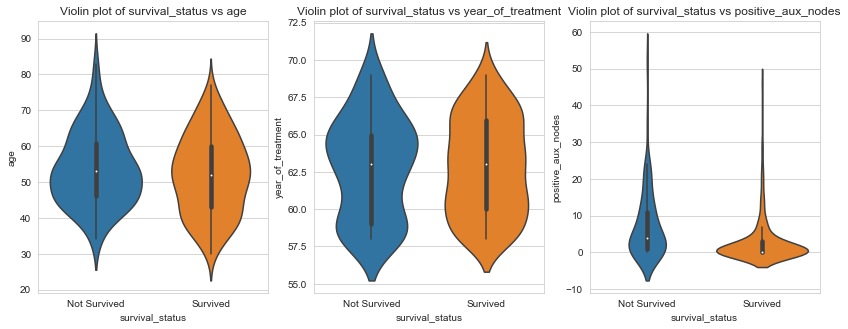

In [72]:
def violin_plot_for_feature(feature, axis):
    g = sns.violinplot(x='survival_status', y=feature, data=patients_df, ax=axis)
    g.set_title('Violin plot of survival_status vs {}'.format(feature))
    

fig, ax = plt.subplots(1,3,figsize=(14, 5))    
    
for index, feature in enumerate(feature_names):
    violin_plot_for_feature(feature, ax[index])       

**Observation(s):**
1. Patients with age less than 43 has slightly higher chance to survive for 5 or more years after surgery.
2. Patients who are treated before 1960 are more likely to die within 5 years of surgery and those whoe are treated after 1966 have slighlty higher chance to surive than the rest. 
3. Around 80% of patients who survived 5 years or more after surgery has positive aux nodes less than 5.

## Conclusion

1. The given dataset is imbalanced as it does not contains equal number of data-points for both classes.
2. There are too much overlapping in the data-points and hence it is very diffucult to classify.
3. axillary_lymph_node is giving some intution in the dataset.
4. We can not build simple model using only if else condition we need to have some more complex technique to handle this dataset.